# **Import Necesarry Library**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

# **Read the CSV file and load data**

In [ ]:
data = pd.read_csv("Data lat dan lon Kota palembang.csv", usecols=["Latitude", "Longitude"])


X = data[["Latitude", "Longitude"]]
print("First five elements of X are:\n", X[:5])
print('The shape of X is:', X.shape)
X = data.values


First five elements of X are:
    Latitude   Longitude
0 -2.938783  104.760288
1 -2.906790  104.692254
2 -2.934693  104.690078
3 -2.928436  104.700182
4 -2.934685  104.690082
The shape of X is: (101, 2)


# **Assign Centroids**

In [ ]:
def kMeans_init_centroids(X, K):
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])

    # Take the first K examples as centroids
    centroids = X[randidx[:K]]

    return centroids

# **Function to assign each data point to nearest centroid (Clustering)**

In [ ]:
def find_closest_centroids(X, centroids):
 # Set K
    K = centroids.shape[0]

    idx = np.zeros(X.shape[0], dtype=int)

    for i in range(X.shape[0]):
        distance = []
        for j in range(centroids.shape[0]):
            norm_ij = np.linalg.norm(X[i] - centroids[j])
            distance.append(norm_ij)

        idx[i] = np.argmin(distance)

    return idx

# **Update position of the centroid every iteration**

In [ ]:
def compute_centroids(X, idx, K):

    m, n = X.shape

    centroids = np.zeros((K, n))

    for k in range(K):
        points = X[idx == k]
        centroids[k] = np.mean(points, axis = 0)




    return centroids

# **Function For the training**

In [ ]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):

    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    for i in range(max_iters):

        print("K-Means iteration %d/%d" % (i, max_iters-1))

        idx = find_closest_centroids(X, centroids)

        def plot_progress_kMeans(X, centroids, previous_centroids, idx, K, iteration):
            plt.scatter(X[:, 0], X[:, 1], c=idx, cmap='viridis', label='Data Points')
            plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='red', label='Centroids')
            plt.scatter(previous_centroids[:, 0], previous_centroids[:, 1], marker='o', s=100, color='blue', alpha=0.5, label='Previous Centroids')
            plt.title(f'K-Means Clustering - Iteration {iteration}')
            plt.xlabel('Latitude')
            plt.ylabel('Longitude')
            plt.legend()
            plt.show()
        if plot_progress:

            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
        centroids = compute_centroids(X, idx, K)
    plt.show()
    return centroids, idx

# **Training**

K-Means iteration 0/19


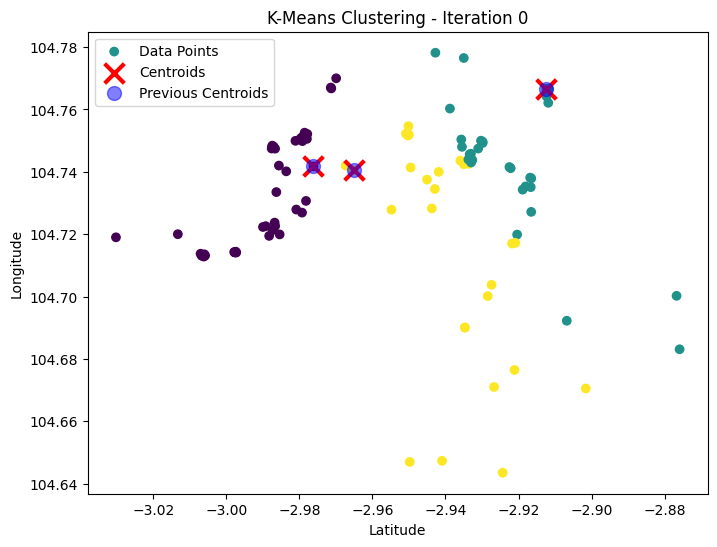

K-Means iteration 1/19


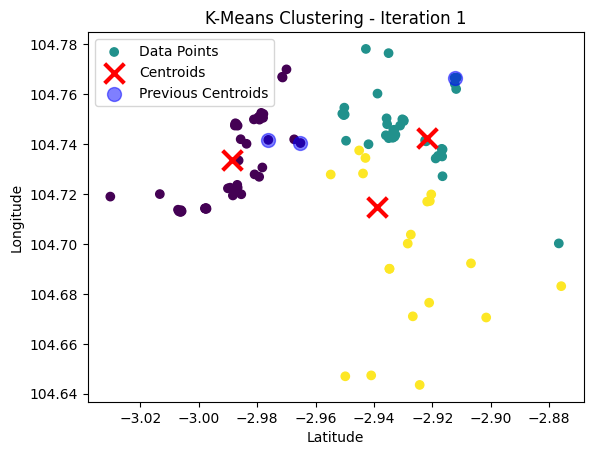

K-Means iteration 2/19


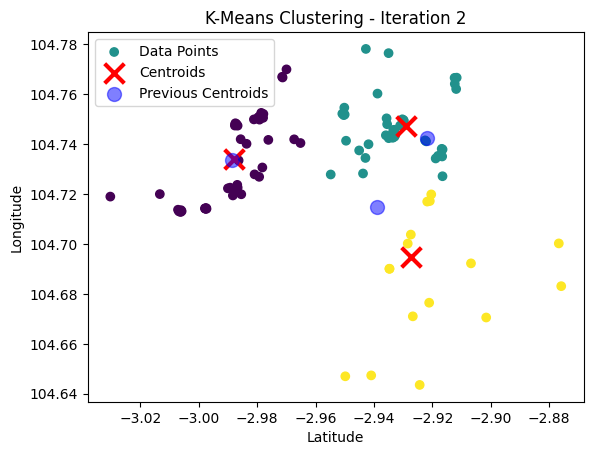

K-Means iteration 3/19


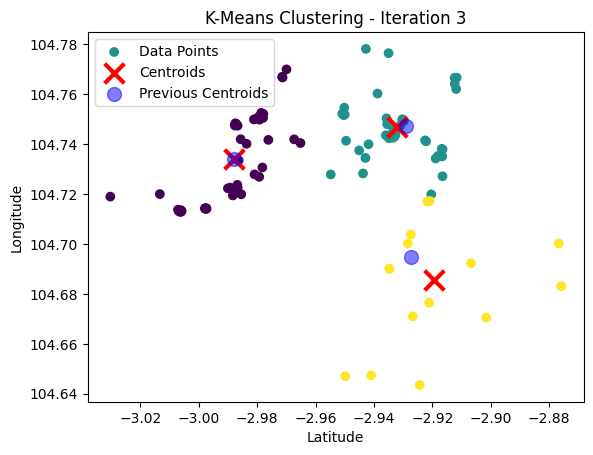

K-Means iteration 4/19


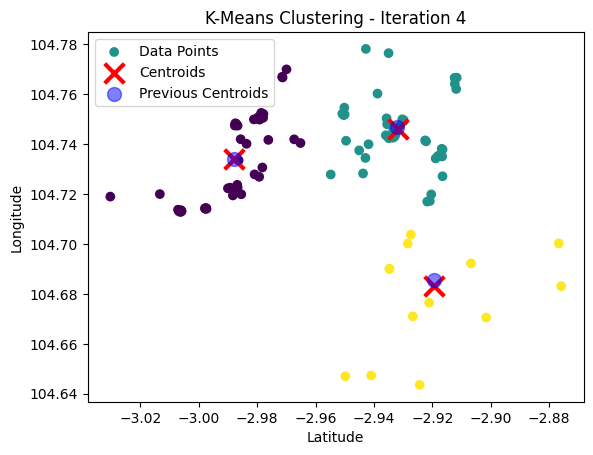

K-Means iteration 5/19


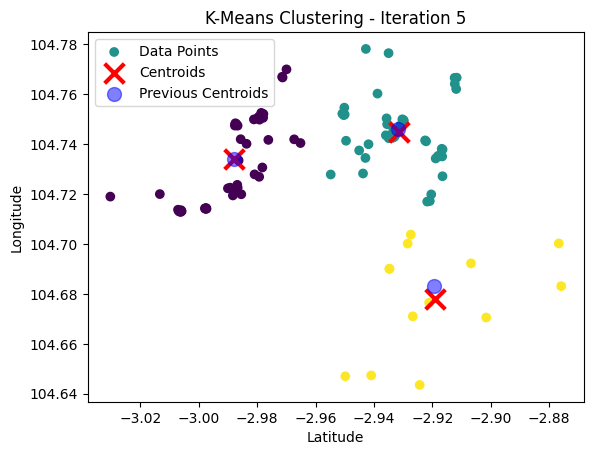

K-Means iteration 6/19


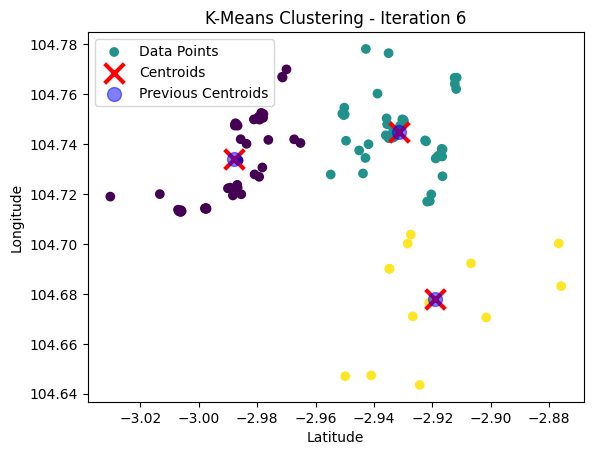

K-Means iteration 7/19


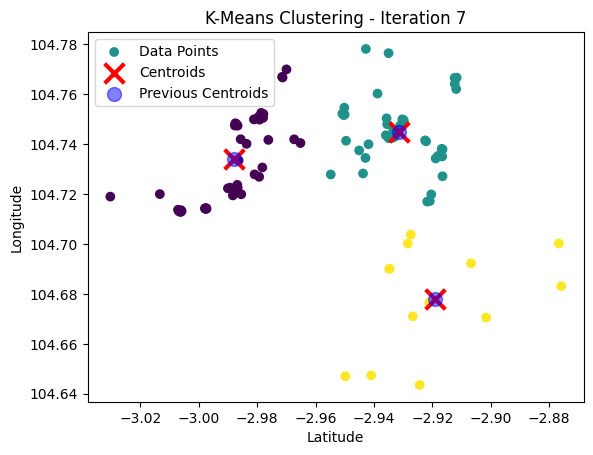

K-Means iteration 8/19


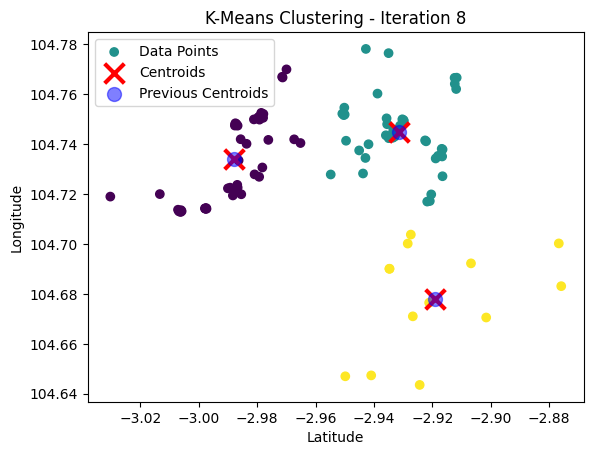

K-Means iteration 9/19


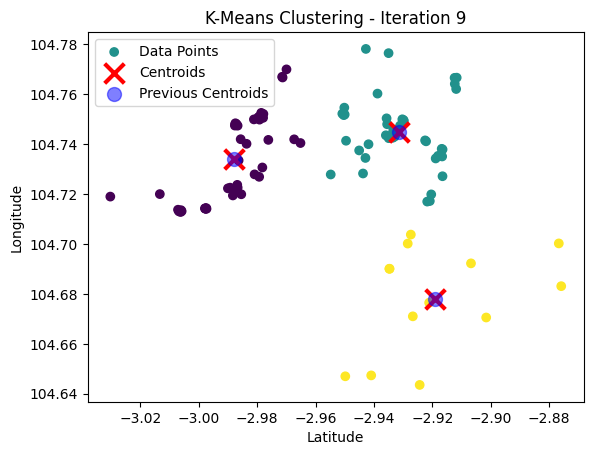

K-Means iteration 10/19


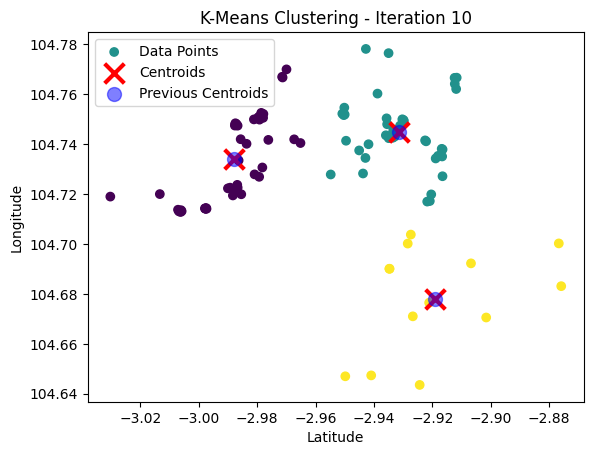

K-Means iteration 11/19


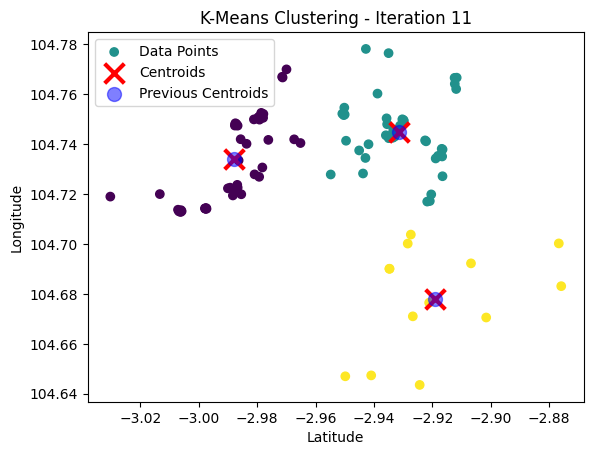

K-Means iteration 12/19


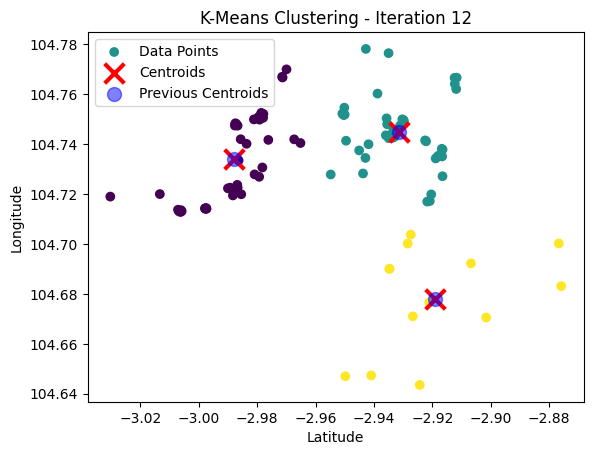

K-Means iteration 13/19


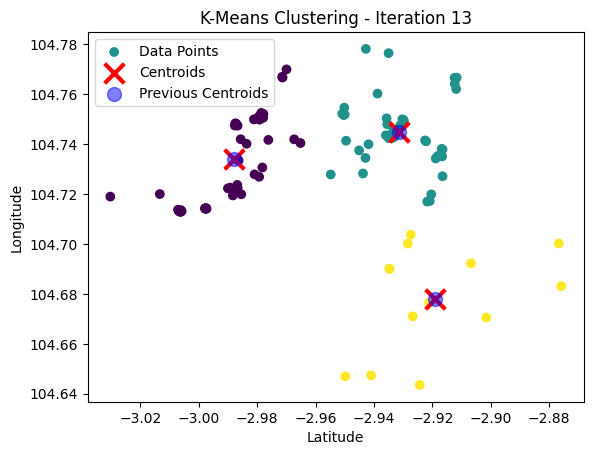

K-Means iteration 14/19


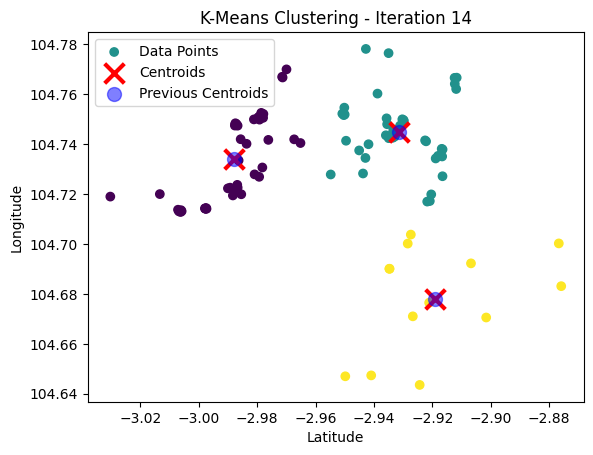

K-Means iteration 15/19


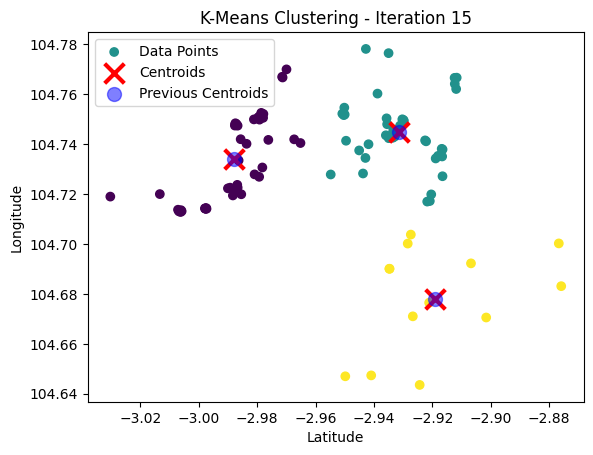

K-Means iteration 16/19


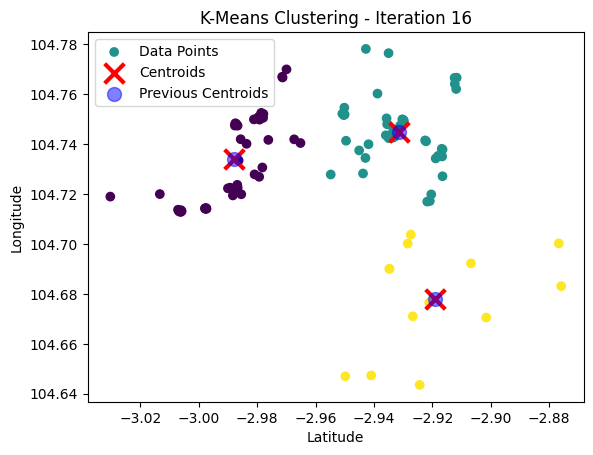

K-Means iteration 17/19


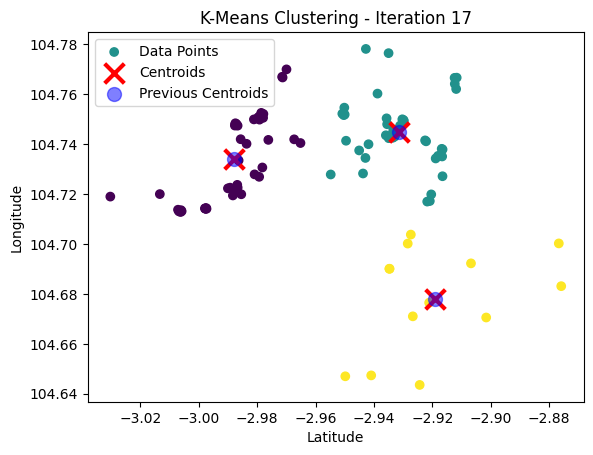

K-Means iteration 18/19


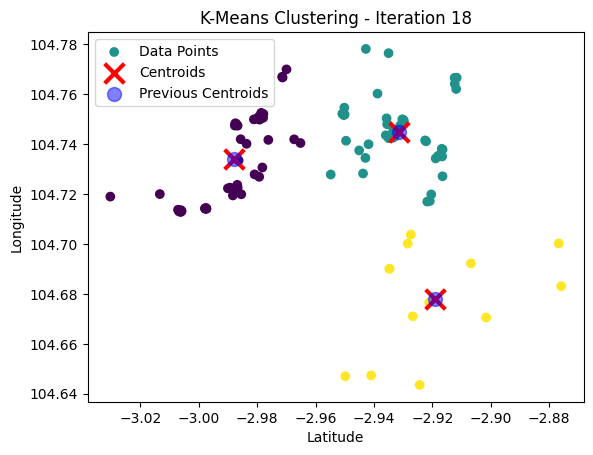

K-Means iteration 19/19


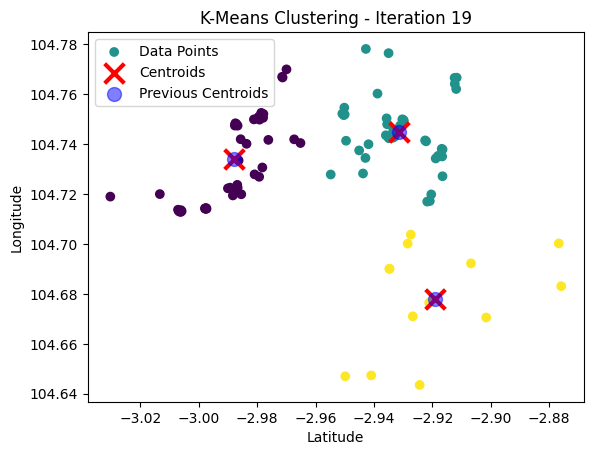

In [ ]:
K = 3
max_iters = 20

initial_centroids = kMeans_init_centroids(X, K)

centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)



# **Saving the model (dont need to save the model)**

this is becasuse if we save the model the centroid will stay the same so its a bad idea if the data update real time!

In [ ]:
data_to_save = {'centroids': centroids, 'cluster_assignments': idx}
joblib.dump(data_to_save, 'kmeans_model.pkl')
print("K-Means result saved.")

tf.saved_model.save(model, 'KMeans_Model', signatures={'serving_default': model.predict_with_assignments_and_centroids})
print("K-Means model saved.")

K-Means model saved.


In [ ]:
import tensorflow as tf

loaded_data = joblib.load('kmeans_model.pkl')

centroids = loaded_data['centroids']
cluster_assignments = loaded_data['cluster_assignments']

print(centroids)
print(cluster_assignments)

[[ -2.987734  104.73416  ]
 [ -2.9313698 104.74488  ]
 [ -2.9191616 104.67812  ]]
[1 2 2 2 2 2 2 2 2 1 1 1 0 0 0 0 0 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0]


the result will be like this which is weird how they assign the cluster to all 0 but after researching I find that its like this because the data is different but the centroid stays the same, the model worked but because the centroid stay the same place thats why it assign it to 0 because the nearest centroid to all the data points is 0